<a href="https://colab.research.google.com/github/safakan/CCTB_repo_safak_atakan_celik/blob/main/DEA113/Assignment4/Assignment4_EDA_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# #to ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

## **Load Data**

In [2]:
url = "https://raw.githubusercontent.com/safakan/CCTB_repo_safak_atakan_celik/refs/heads/main/DEA113/Assignment4/used_cars_data.csv"

data = pd.read_csv(url)

data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## **Check Data**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [4]:
data.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
# Missing value percentages
(data.isnull().sum()/len(data))*100

,0
S.No.,0.000000
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,0.027575
Engine,0.634220


In [6]:
# Unique value counts
data.nunique()

,0
S.No.,7253
Name,2041
Location,11
Year,23
Kilometers_Driven,3660
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage,450
Engine,150


In [7]:
data.shape

(7253, 14)

**Existing Issues:**
- missing values
- unit inconsistencies within same fields
- units existing within cells; causes numeric types appear as non-numeric


**Questions:**
- any illogical value?
- are there any duplicate listings?
- any outlier/anomalies?
- any other format issues?
- are the mentioned units accurate? what will be the unit assumption for the price? Lakh?

**Fields So Far So Good**
- Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Location

**Cleaning Cases**
1. Data reduction
 - Drop the column "S.No." | It doesn't have significance to this analysis, and it's the same as the index
 - Drop the column "New Price" | It's mostly null, only partially relevant; a separate analysis can be done comparing only existing prices with new prices.

2. Fixing erroneous data
- Move units from cells/values to the field names.
  - do it for columns: Mileage, Engine, New_Price, Power
    - use common unit measures, double check different unit values against assumptions


3. Missing values
 - Mileage, Engine, Seats, Power, New_Price, Price

4. Type check
- double check Mileage, Engine, New_Price and cast them to numeric
- type of Seats can be integer


**Feature Engineering**
- Brand from the Name - requires cleaning
- Car Age


---




**Data Reduction**

In [8]:
# 1.1 Dropping "S.No." bcs it's same as ID, not adding value
data.drop(columns=["S.No."], inplace=True)

In [9]:
# 2 Move units from cells/values to the field names. -- common unit value

data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [ ]:
# 2.2 Create a subset with new prices, old prices that have new prices, and some similar cars with old and new prices.
# then drop new prices, it has many missing values, dropping the entire row would harm the data
# if wanted new prices can be fetched through data mining and analysis either focused on new prices or comparing old/new prices


data[type(data["New_Price"]) == float]

KeyError: False

In [ ]:
type(data["New_Price"][0])

float

In [23]:
# Filter [ non null new price, non null price, ]
df_non_null_new_price = data[data['New_Price'].notnull()]

# there're missing ones yes, but there're many data.. so lets fill.
# I think .. median. bcs it's middle of the range. I don't want these filled cells to affect data signficantly.
# mean and mod seem dangerous. what if we have a a lot from certain places..

# split the values in new_price and store them in a list of lists
new_price_list = df_non_null_new_price['New_Price'].str.split(' ').tolist()

# making sure not removing something we're not aware.
mp = {}
mp["currencies"] = []
for i in new_price_list:
  mp[len(i)] = None #len(mp) == 2 # good
  mp["currencies"].append(i[1]) # print(set(mp["currencies"])) # {'Cr', 'Lakh'}
  if i[1] == "Cr": # Changing all to Lakh
    i[0] = float(i[0]) * 100
  else:
    i[0] = float(i[0])

# add as a new column instead of ..


# new_price_list

# # not everything is in Lakh...
# mp = {}



In [24]:
new_price_list

[[8.61, 'Lakh'],
 [21.0, 'Lakh'],
 [10.65, 'Lakh'],
 [32.01, 'Lakh'],
 [47.87, 'Lakh'],
 [10.57, 'Lakh'],
 [12.33, 'Lakh'],
 [11.12, 'Lakh'],
 [23.64, 'Lakh'],
 [18.64, 'Lakh'],
 [19.34, 'Lakh'],
 [49.14, 'Lakh'],
 [11.81, 'Lakh'],
 [16.65, 'Lakh'],
 [6.67, 'Lakh'],
 [6.45, 'Lakh'],
 [6.41, 'Lakh'],
 [27.0, 'Lakh'],
 [5.13, 'Lakh'],
 [54.43, 'Lakh'],
 [9.51, 'Lakh'],
 [9.96, 'Lakh'],
 [14.44, 'Lakh'],
 [4.53, 'Lakh'],
 [95.04, 'Lakh'],
 [13.49, 'Lakh'],
 [128.0, 'Cr'],
 [60.88, 'Lakh'],
 [7.39, 'Lakh'],
 [69.47, 'Lakh'],
 [8.78, 'Lakh'],
 [12.74, 'Lakh'],
 [10.52, 'Lakh'],
 [11.98, 'Lakh'],
 [8.54, 'Lakh'],
 [33.58, 'Lakh'],
 [9.12, 'Lakh'],
 [5.29, 'Lakh'],
 [44.28, 'Lakh'],
 [20.74, 'Lakh'],
 [11.74, 'Lakh'],
 [25.52, 'Lakh'],
 [14.07, 'Lakh'],
 [95.13, 'Lakh'],
 [8.34, 'Lakh'],
 [8.34, 'Lakh'],
 [8.85, 'Lakh'],
 [25.4, 'Lakh'],
 [16.67, 'Lakh'],
 [79.43, 'Lakh'],
 [6.62, 'Lakh'],
 [104.0, 'Cr'],
 [9.12, 'Lakh'],
 [58.67, 'Lakh'],
 [28.37, 'Lakh'],
 [4.48, 'Lakh'],
 [72.64, 'Lakh'],


---

ANYTHING BELOW IS A DRAFT

---

**start--playground-cell**

In [ ]:
data[data["Mileage"].isnull()]
# two records here
## A.Name: Mahindra E Verito D4
## B.Name: Toyota Prius 2009-2016 Z4
## A, B: Milege NaN
### B: New_Price NaN

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


**end--playground-cell**

In [ ]:
data["Name"].dropna().apply(lambda x: x.split(" ")[0]).unique()
# mini -> mini cooper
# land -> land rover
# isuzus unite into > Isuzu

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [ ]:
# something like this: data["Name"] column values that starts with "Maruti"
data[data["Name"].str.startswith("Opel")]["Name"]

,Name
7067,OpelCorsa 1.4Gsi


## Save For Later

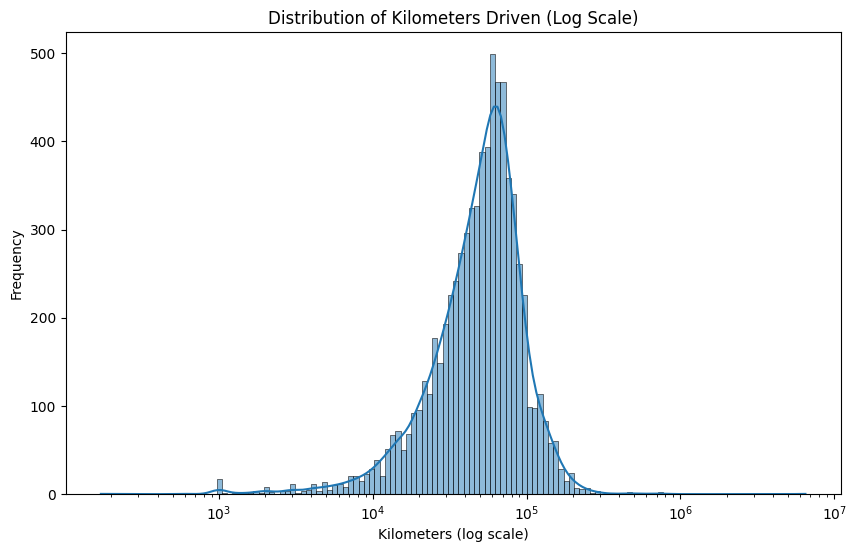

In [ ]:
# Kilometers Driven
plt.figure(figsize=(10, 6))
sns.histplot(data=data['Kilometers_Driven'], kde=True, log_scale=True)
plt.title('Distribution of Kilometers Driven (Log Scale)')
plt.xlabel('Kilometers (log scale)')
plt.ylabel('Frequency')
plt.show()

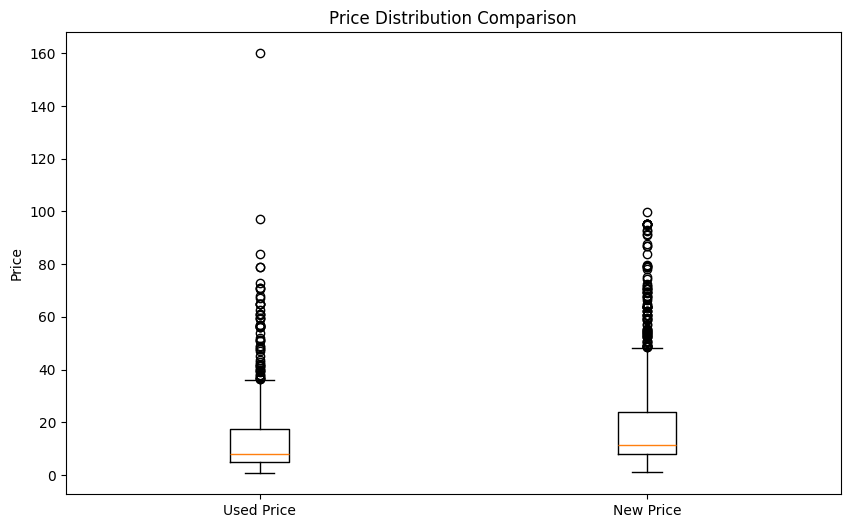

In [ ]:
# Compare Used & New Prices
new_prices = data["New_Price"].dropna().apply(lambda x: x.split(" ")[0]).astype(float)
prices = data[data["New_Price"].notnull()]["Price"].dropna()

# only keep records where both new prices and prices have values
new_prices = new_prices[new_prices.index.isin(prices.index)]
prices = prices[prices.index.isin(new_prices.index)]


# box plot
plt.figure(figsize=(10, 6))
plt.boxplot([prices, new_prices], tick_labels=['Used Price', 'New Price'])
plt.title('Price Distribution Comparison')
plt.ylabel('Price')
plt.show()

In [ ]:
# consider this analysis
def find_similar_listings(df):
    # Group by Name and analyze each group
    similar_listings = []

    for name in df[df['Name'].duplicated(keep=False)]['Name'].unique():
        group = df[df['Name'] == name]

        # If same location and price difference within 5%
        if len(group) > 1:
            for i in range(len(group)):
                for j in range(i+1, len(group)):
                    row1 = group.iloc[i]
                    row2 = group.iloc[j]

                    # Check if location is same
                    same_location = row1['Location'] == row2['Location']

                    # Check if price difference is within 5%
                    if row1['Price'] and row2['Price']:  # Ensure prices exist
                        price_diff_pct = abs(row1['Price'] - row2['Price']) / row1['Price'] * 100
                        similar_price = price_diff_pct <= 5

                        if same_location and similar_price:
                            similar_listings.append((row1.name, row2.name))

    return similar_listings

# similar_listings = find_similar_listings(data)
# print(similar_listings)